In [2]:
import numpy as np
import keras
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import MaxPooling2D, AveragePooling2D, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import math
import h5py
import tensorflow as tf
from tensorflow.keras import callbacks


%matplotlib inline

Using TensorFlow backend.


In [3]:
import pandas as pd
import numpy as np
import cv2 

emotions = ['Negativity', 'Happy', 'Sad', 'Surprise', 'Neutral']
classes = len(emotions)
print(classes)

5


In [4]:
#using Kaggle dataset from the challenge : CHALLENGES IN REPRESENTATION LEARNING: FACIAL EXPRESSION RECOGNITON CHALLENGE
#(https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge)


import pandas as pd
import numpy as np
import cv2
def1 = pd.read_csv(r'../input/fe2013landmarks/labeldata1.csv',names = ['label']) #reading dataframe of labels of the dataset, arranged sequentially 

In [5]:
def1["label"] = def1.iloc[:,0:]
def1
def1.replace(to_replace ={'label': {1:0}}, inplace = True) #replacing underrepresented class "Disgust"
def1.replace(to_replace ={'label': {2:0}}, inplace = True) #replacing underrepresented class "Fear"
def1.replace(to_replace ={'label': {3:1}}, inplace = True)
def1.replace(to_replace ={'label': {4:2}}, inplace = True)
def1.replace(to_replace ={'label': {5:3}}, inplace = True)
def1.replace(to_replace ={'label': {6:4}}, inplace = True)


In [6]:
train_set_x_orig=[]
#with tpu_strategy.scope():
for id in range(24942): 
    image = cv2.imread('../input/ldzipp/landmarks2/'+str(id)+'.png') #reading image pixel data into numpy arrays
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image,(48,48))
    array = np.array(image)
    print(array.shape)
    train_set_x_orig.append(array) #appending image pixel data to a training set

(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(

(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(

(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(

(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(

(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(

(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(

(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(

(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(

(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(

(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(

(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(

(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(

(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(

(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(

(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(

(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(

(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(

(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(

(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(

(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(

(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(

(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(

(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(

(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(

(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(

(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(

(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(

In [7]:
train_set_x_orig = np.array(train_set_x_orig) 
print(train_set_x_orig.shape)

(24942, 48, 48)


In [8]:
train_set_x_orig = train_set_x_orig.reshape((24942,48,48,1)) #reshaping to depict Grayscale images of size (48,48) px
print(train_set_x_orig.shape)

(24942, 48, 48, 1)


In [9]:
train_set_y_orig = np.array(def1.label).astype(int) #appending labels into training set
print(train_set_y_orig.shape[0])
print(train_set_y_orig)

24942
[0 0 0 ... 0 4 0]


In [10]:
from sklearn.model_selection import train_test_split
train_set_x_orig, test_set_x_orig, train_set_y_orig, test_set_y_orig = train_test_split(train_set_x_orig, train_set_y_orig,shuffle = True, stratify = train_set_y_orig, random_state = 2020, test_size = 0.2 )
print(train_set_x_orig.shape)
print(test_set_x_orig.shape)
print(test_set_x_orig.shape)
print(test_set_y_orig.shape)

(19953, 48, 48, 1)
(4989, 48, 48, 1)
(4989, 48, 48, 1)
(4989,)


In [11]:
# Normalize image vectors
X_train = train_set_x_orig/255
X_test = test_set_x_orig/255

# Reshape
Y_train = train_set_y_orig.T
Y_test = test_set_y_orig.T


print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 19953
number of test examples = 4989
X_train shape: (19953, 48, 48, 1)
Y_train shape: (19953,)
X_test shape: (4989, 48, 48, 1)
Y_test shape: (4989,)


In [12]:
from keras.utils import to_categorical
Y_train = to_categorical(Y_train, num_classes = classes) #converting to categorical
Y_test = to_categorical(Y_test, num_classes = classes)

In [13]:
print(Y_train.shape)
print(Y_test.shape)

(19953, 5)
(4989, 5)


In [14]:
from keras import regularizers
#with tpu_strategy.scope():
def Moodel1(input_shape):
   
    
    X_input = Input(input_shape)
    
    #Block 1 -- conv2d - MaxPooling
    
    X = ZeroPadding2D((3,3))(X_input)
    
    X = Conv2D(32,(3,3), strides = (1,1), name = 'conv0')(X)
    X = BatchNormalization(axis=3, name = 'bn0')(X)
    X = Activation('relu')(X)

    #MaxPool
    
    X = MaxPooling2D((3,3), strides = (1,1), name = 'max_pool_0')(X)
    
    
    #Block2 -- conv2D -- maxpool2D
    
    X = Conv2D(64,(3,3), name = 'conv1')(X)
    X = BatchNormalization(axis=3, name = 'bn1')(X)
    X = Activation('relu')(X)
    #MaxPool
    
    X= MaxPooling2D((2,2), strides = (2,2), name = 'max_pool_1')(X)
    
    
    #Block3 -- conv2D -- MaxPool2D
    
    X = Conv2D(80,(3,3), name ="conv2")(X)
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation("relu")(X)

    #MaxPool
    
    X = MaxPooling2D((3,3), strides = (1,1), name = 'max_pool_2')(X)
    
    
    #Block4 -- conv2D -- MaxPool2D
    
    X = Conv2D(160,(3,3), name ="conv3")(X)
    X = BatchNormalization(axis = 3, name = 'bn3')(X)
    X = Activation("relu")(X)
    
    #MaxPool
    
    X = MaxPooling2D((2,2), strides = (2,2), name = 'max_pool_3')(X)
    
    
    #Block5 -- conv2D -- MaxPool2D
    
    X = Conv2D(320,(2,2), name ="conv4")(X)
    X = BatchNormalization(axis = 3, name = 'bn4')(X)
    X = Activation("relu")(X)

    #MaxPool
    
    X = MaxPooling2D((2,2), strides = (2,2), name = 'max_pool_4')(X)
    
    #Block6 -- conv2D
    
    X = Conv2D(512,(1,1), name ="conv5")(X)
    X = BatchNormalization(axis = 3, name = 'bn5')(X)
    X = Activation("relu")(X)
    
    #Block7 -- flatten --dense
        
    X = layers.Dropout(0.5)(X)
    X = Flatten()(X)
    X = Dense(100, activation = 'relu', name = 'fc')(X)
    
    X = Dense(64, activation = 'relu', name = 'fc2')(X)
    X = Dense(5, activation = 'softmax', name = 'fc3')(X)
    
   
    
    #Block8 -- return model 
    
    model = Model(inputs = X_input, outputs = X, name = 'Moodel')
    
    return model

Learning rate schedule: 0.002 to 0.006 to 0.0013


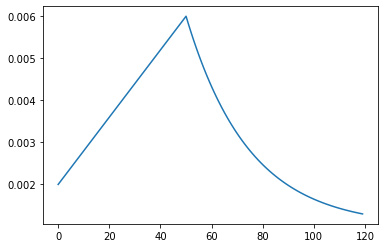

In [15]:

#defining custom callback to regulate learning rate
# Starting with a high LR would break the pre-trained weights.
EPOCHS = 120
BATCH_SIZE = 160
LR_START = 0.002
LR_MAX = 0.006
LR_MIN = 0.001
LR_RAMPUP_EPOCHS = 50
LR_SUSTAIN_EPOCHS = 0
LR_EXP_DECAY = .96

def lrfn(epoch):
    if epoch < LR_RAMPUP_EPOCHS:
        lr = (LR_MAX - LR_START) / LR_RAMPUP_EPOCHS * epoch + LR_START
    elif epoch < LR_RAMPUP_EPOCHS + LR_SUSTAIN_EPOCHS:
        lr = LR_MAX
    else:
        lr = (LR_MAX - LR_MIN) * LR_EXP_DECAY**(epoch - LR_RAMPUP_EPOCHS - LR_SUSTAIN_EPOCHS) + LR_MIN
    return lr
    
lr_callback = tf.keras.callbacks.LearningRateScheduler(lrfn, verbose=True)

rng = [i for i in range(EPOCHS)]
y = [lrfn(x) for x in rng]
plt.plot(rng, y)
print("Learning rate schedule: {:.3g} to {:.3g} to {:.3g}".format(y[0], max(y), y[-1]))

In [16]:
moodel1 = Moodel1(X_train.shape[1:]) #training model with input shape (48,48,1)

In [17]:
moodel1.summary()

Model: "Moodel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 1)]       0         
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 54, 54, 1)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 52, 52, 32)        320       
_________________________________________________________________
bn0 (BatchNormalization)     (None, 52, 52, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 52, 52, 32)        0         
_________________________________________________________________
max_pool_0 (MaxPooling2D)    (None, 50, 50, 32)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 48, 48, 64)        18496

In [20]:
print(X_train.shape)

(19953, 48, 48, 1)


In [22]:
#compiling the model
moodel1.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"]) 

In [23]:
#using supervised learning to fit the model
history1 = moodel1.fit(X_train,Y_train, epochs = EPOCHS, batch_size=160, verbose = 1, validation_split = 0.4, shuffle=True, callbacks=[lr_callback])


Epoch 00001: LearningRateScheduler reducing learning rate to 0.002.
Epoch 1/120
75/75 [==============================] - 4s 57ms/step - loss: 1.5383 - accuracy: 0.4101 - val_loss: 1.6817 - val_accuracy: 0.1844 - lr: 0.0020

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0020800000000000003.
Epoch 2/120
75/75 [==============================] - 3s 45ms/step - loss: 1.1137 - accuracy: 0.5448 - val_loss: 1.8815 - val_accuracy: 0.1844 - lr: 0.0021

Epoch 00003: LearningRateScheduler reducing learning rate to 0.00216.
Epoch 3/120
75/75 [==============================] - 3s 44ms/step - loss: 1.0033 - accuracy: 0.5873 - val_loss: 2.1584 - val_accuracy: 0.1506 - lr: 0.0022

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0022400000000000002.
Epoch 4/120
75/75 [==============================] - 3s 44ms/step - loss: 0.9501 - accuracy: 0.6139 - val_loss: 1.6324 - val_accuracy: 0.4540 - lr: 0.0022

Epoch 00005: LearningRateScheduler reducing learning rate to 0.00232.

75/75 [==============================] - 3s 43ms/step - loss: 0.1227 - accuracy: 0.9569 - val_loss: 1.8313 - val_accuracy: 0.6200 - lr: 0.0048

Epoch 00037: LearningRateScheduler reducing learning rate to 0.004880000000000001.
Epoch 37/120
75/75 [==============================] - 3s 43ms/step - loss: 0.1853 - accuracy: 0.9341 - val_loss: 1.6163 - val_accuracy: 0.5961 - lr: 0.0049

Epoch 00038: LearningRateScheduler reducing learning rate to 0.004960000000000001.
Epoch 38/120
75/75 [==============================] - 3s 44ms/step - loss: 0.1235 - accuracy: 0.9553 - val_loss: 1.8074 - val_accuracy: 0.6275 - lr: 0.0050

Epoch 00039: LearningRateScheduler reducing learning rate to 0.00504.
Epoch 39/120
75/75 [==============================] - 3s 43ms/step - loss: 0.1297 - accuracy: 0.9535 - val_loss: 2.2532 - val_accuracy: 0.5532 - lr: 0.0050

Epoch 00040: LearningRateScheduler reducing learning rate to 0.00512.
Epoch 40/120
75/75 [==============================] - 3s 43ms/step - loss: 0.12

75/75 [==============================] - 3s 44ms/step - loss: 0.0262 - accuracy: 0.9912 - val_loss: 2.3278 - val_accuracy: 0.6353 - lr: 0.0032

Epoch 00072: LearningRateScheduler reducing learning rate to 0.0031216116826211556.
Epoch 72/120
75/75 [==============================] - 3s 43ms/step - loss: 0.0228 - accuracy: 0.9921 - val_loss: 2.2080 - val_accuracy: 0.6450 - lr: 0.0031

Epoch 00073: LearningRateScheduler reducing learning rate to 0.0030367472153163093.
Epoch 73/120
75/75 [==============================] - 3s 43ms/step - loss: 0.0210 - accuracy: 0.9918 - val_loss: 2.4832 - val_accuracy: 0.6548 - lr: 0.0030

Epoch 00074: LearningRateScheduler reducing learning rate to 0.002955277326703657.
Epoch 74/120
75/75 [==============================] - 3s 44ms/step - loss: 0.0213 - accuracy: 0.9926 - val_loss: 2.2976 - val_accuracy: 0.6520 - lr: 0.0030

Epoch 00075: LearningRateScheduler reducing learning rate to 0.0028770662336355104.
Epoch 75/120
75/75 [==============================

75/75 [==============================] - 3s 44ms/step - loss: 0.0083 - accuracy: 0.9968 - val_loss: 2.7187 - val_accuracy: 0.6461 - lr: 0.0016

Epoch 00106: LearningRateScheduler reducing learning rate to 0.001529526649219905.
Epoch 106/120
75/75 [==============================] - 3s 43ms/step - loss: 0.0090 - accuracy: 0.9968 - val_loss: 2.6574 - val_accuracy: 0.6488 - lr: 0.0015

Epoch 00107: LearningRateScheduler reducing learning rate to 0.001508345583251109.
Epoch 107/120
75/75 [==============================] - 3s 43ms/step - loss: 0.0055 - accuracy: 0.9977 - val_loss: 2.6024 - val_accuracy: 0.6630 - lr: 0.0015

Epoch 00108: LearningRateScheduler reducing learning rate to 0.0014880117599210645.
Epoch 108/120
75/75 [==============================] - 3s 43ms/step - loss: 0.0055 - accuracy: 0.9978 - val_loss: 2.8189 - val_accuracy: 0.6612 - lr: 0.0015

Epoch 00109: LearningRateScheduler reducing learning rate to 0.001468491289524222.
Epoch 109/120
75/75 [============================

In [24]:
#evaluating model accuracy
moodel1.evaluate(X_test,Y_test)


156/156 [==============================] - 1s 5ms/step - loss: 3.0859 - accuracy: 0.6697


[3.085907220840454, 0.6696732640266418]

In [25]:
final_accuracy = history1.history["val_accuracy"][-5:]
print("FINAL ACCURACY MEAN-5: ", np.mean(final_accuracy)) #displaying mean of final validation accuracy

FINAL ACCURACY MEAN-5:  0.6607116103172302


In [26]:
def display_training_curves(training, validation, title, subplot):
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        #plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

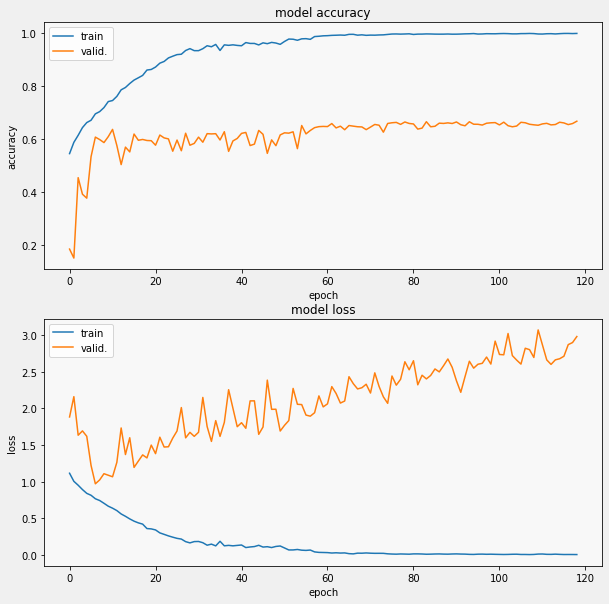

In [27]:
#displaying model training curves

display_training_curves(history1.history['accuracy'][1:], history1.history['val_accuracy'][1:], 'accuracy', 211)
display_training_curves(history1.history['loss'][1:], history1.history['val_loss'][1:], 'loss', 212)

In [30]:
moodel1.save('Moodelld1_5def2.h5')